In [50]:
!apt-get install python3.8
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os,sys
import tensorflow as tf
import numpy as np
import datetime,os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, datasets, callbacks, metrics, models
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model, Model
from keras.models import Sequential
import keras

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.8 is already the newest version (3.8.8-1+bionic2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [51]:
(train_image, train_label), (test_images, test_labels) = datasets.cifar10.load_data()

num_train = int(round(len(train_image)*0.8))
train_images, valid_images = train_image[:num_train], train_image[num_train:]
train_labels, valid_labels = train_label[:num_train], train_label[num_train:]

train_images, valid_images, test_images = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [52]:
print("training dataset   :" + str(len(train_images)))
print("validation dataset :" + str(len(valid_images)))
print("test dataset       :" + str(len(test_images)))

training dataset   :40000
validation dataset :10000
test dataset       :10000


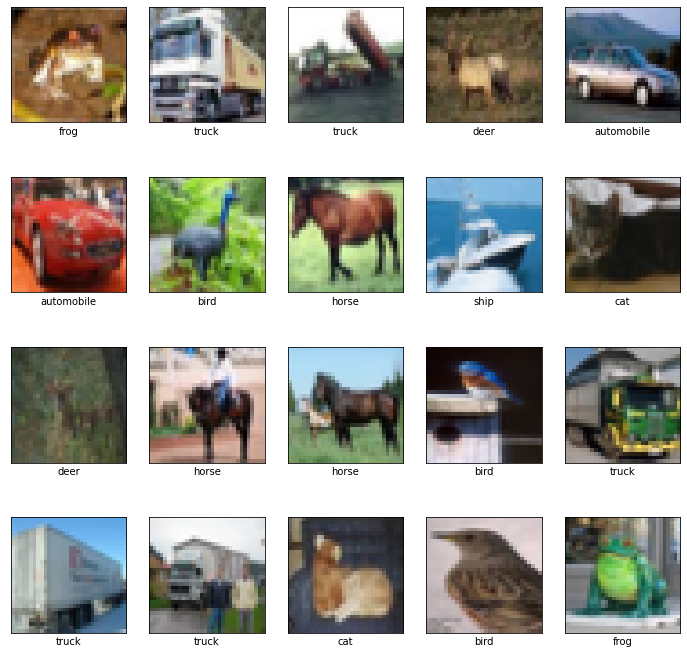

In [53]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [54]:
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10)(x)

model = Model(inputs, outputs, name='model_1')

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 16)          2320      
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0   

In [55]:

layers.Conv2D(16, (3, 3), strides=(1, 1), padding='same',
activation='relu')

layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='same')

In [56]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [57]:
model_TensorBoard = callbacks.TensorBoard(logdir)
model_checkpoint_callback = callbacks.ModelCheckpoint(logdir + '/Best-model5.hdf5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max')

In [58]:
from keras.callbacks import ModelCheckpoint
model.compile(optimizer='SGD',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, batch_size=32,
                   validation_data=(valid_images, valid_labels),
                    callbacks=[model_TensorBoard, model_checkpoint_callback])

Epoch 1/15
1250/1250 [==============================] - 43s 34ms/step - loss: 2.2361 - accuracy: 0.1479 - val_loss: 2.0186 - val_accuracy: 0.2838
Epoch 2/15
1250/1250 [==============================] - 42s 34ms/step - loss: 1.9260 - accuracy: 0.3069 - val_loss: 1.7752 - val_accuracy: 0.3624
Epoch 3/15
1250/1250 [==============================] - 44s 35ms/step - loss: 1.7035 - accuracy: 0.3847 - val_loss: 1.6179 - val_accuracy: 0.4160
Epoch 4/15
1250/1250 [==============================] - 44s 35ms/step - loss: 1.6044 - accuracy: 0.4193 - val_loss: 1.5404 - val_accuracy: 0.4451
Epoch 5/15
1250/1250 [==============================] - 43s 34ms/step - loss: 1.5411 - accuracy: 0.4444 - val_loss: 1.4954 - val_accuracy: 0.4559
Epoch 6/15
1250/1250 [==============================] - 41s 33ms/step - loss: 1.4782 - accuracy: 0.4648 - val_loss: 1.4980 - val_accuracy: 0.4587
Epoch 7/15
1250/1250 [==============================] - 41s 33ms/step - loss: 1.4287 - accuracy: 0.4861 - val_loss: 1.3924 -

313/313 [==============================] - 4s 13ms/step - loss: 0.9912 - accuracy: 0.6540


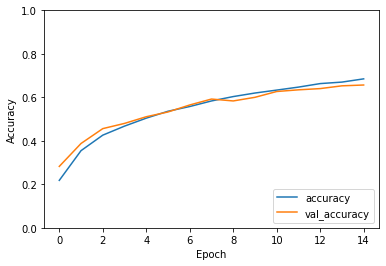

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

In [42]:
model = load_model("./logs/20210402-084857/Best-model4.hdf5")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('test accuracy :'+str(test_acc))

313/313 [==============================] - 5s 14ms/step - loss: 0.9912 - accuracy: 0.6540
test accuracy :0.6539999842643738
